In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/UpdatedResumeDataSet.csv")

In [ ]:
print(data.head())

       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...


In [ ]:
# Check for missing values
print(data.isnull().sum())


Category    0
Resume      0
dtype: int64


No missing values found.

In [ ]:
import re

# Function to clean text
def clean_text(text):
    text = text.lower()

    text = re.sub(r'\W', ' ', text)
    return text


data['Cleaned_Resume'] = data['Resume'].apply(clean_text)


In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Tokenize the text
data['Tokenized_Resume'] = data['Cleaned_Resume'].apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# Lemmatize tokens
data['Lemmatized_Resume'] = data['Tokenized_Resume'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words
data['Cleaned_Resume'] = data['Cleaned_Resume'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Transform the text into numerical vectors
X = vectorizer.fit_transform(data['Cleaned_Resume']).toarray()


In [ ]:
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.8, min_df=2, ngram_range=(1,2))


In [ ]:
# Feature matrix
print(X)


[[0.         0.         0.         ... 0.         0.02327872 0.        ]
 [0.         0.         0.         ... 0.         0.36042514 0.        ]
 [0.         0.         0.         ... 0.         0.34491447 0.        ]
 ...
 [0.         0.02663717 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.07991406 0.        ]
 [0.         0.15391169 0.         ... 0.22964537 0.         0.        ]]


In [ ]:
from sklearn.model_selection import train_test_split

y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-validated scores: {scores}')
print(f'Mean accuracy: {scores.mean()}')


Cross-validated scores: [0.97927461 1.         1.         1.         0.99479167]
Mean accuracy: 0.9948132556131262


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9896193771626297


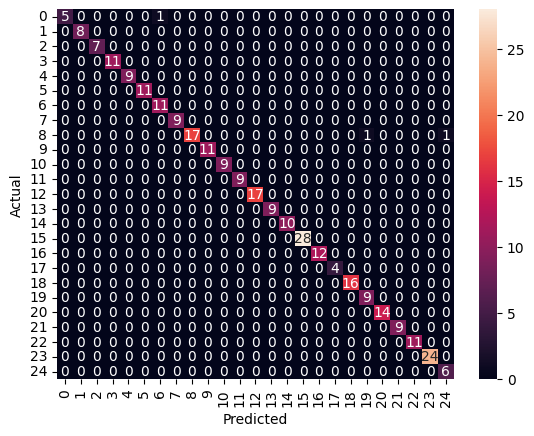

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=model.classes_)

y_prob = model.predict_proba(X_test)

# AUC for each class using the 'ovr' strategy
auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')
print(f'AUC: {auc}')


AUC: 0.9997738791423002


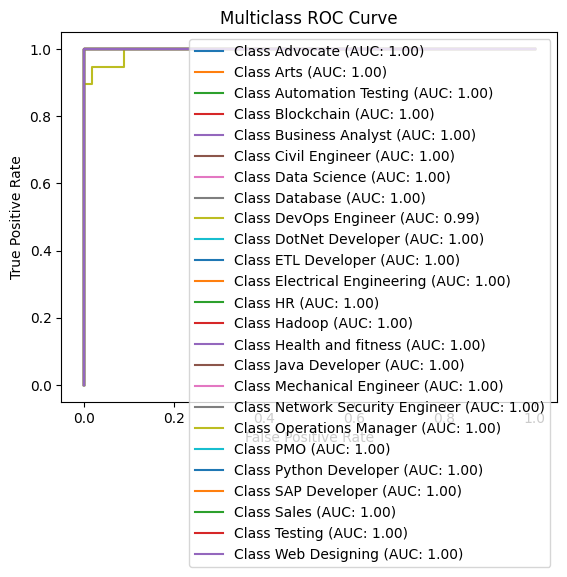

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

for i, class_label in enumerate(model.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC: {roc_auc_score(y_test_bin[:, i], y_prob[:, i]):.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='best')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


                           precision    recall  f1-score   support

                 Advocate       1.00      0.83      0.91         6
                     Arts       1.00      1.00      1.00         8
       Automation Testing       1.00      1.00      1.00         7
               Blockchain       1.00      1.00      1.00        11
         Business Analyst       1.00      1.00      1.00         9
           Civil Engineer       1.00      1.00      1.00        11
             Data Science       0.92      1.00      0.96        11
                 Database       1.00      1.00      1.00         9
          DevOps Engineer       1.00      0.89      0.94        19
         DotNet Developer       1.00      1.00      1.00        11
            ETL Developer       1.00      1.00      1.00         9
   Electrical Engineering       1.00      1.00      1.00         9
                       HR       1.00      1.00      1.00        17
                   Hadoop       1.00      1.00      1.00     

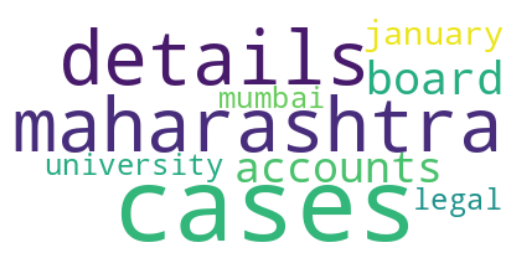

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='white').generate(' '.join(important_features))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
# (words with the highest coefficients)
feature_importance = model.coef_[0]
important_features = vectorizer.get_feature_names_out()[feature_importance.argsort()[-10:]]
print(f'Most important features: {important_features}')


Most important features: ['cases' 'com' 'maharashtra' 'details' 'board' 'accounts' 'january'
 'university' 'mumbai' 'legal']
